# HRInsights Employee Turnover Prediction Model

Authors: Group 8 - Pooja, Cedrick, Charles, Priyanka
Date: 12-03-2024

Description:
This script trains a machine learning model to predict employee turnover using historical data. The model is built to analyze various features such as employee job-related factors, and performance metrics to forecast whether an employee is likely to leave the company. By identifying potential turnover risks, HRInsights aims to help organizations proactively address employee retention strategies and improve workforce management.

Dataset:
The model is trained on a dataset containing historical records of employee attributes, including but not limited to:
- Job-related factors (salary, job satisfaction, tenure, etc.)
- Performance metrics (performance ratings, productivity, etc.)
- Turnover status (whether the employee left the company or not)

Approach:
1. Data Preprocessing: Clean the dataset, handle missing values, encode categorical variables, and scale numerical features.
2. Feature Engineering: Extract relevant features, create new features if necessary, and perform dimensionality reduction.
3. Model Selection: Experiment with various machine learning algorithms such as logistic regression, random forest, etc.
4. Model Training: Train the selected model using the preprocessed data.
5. Model Evaluation: Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score.
6. Hyperparameter Tuning: Fine-tune the model hyperparameters to optimize performance.
7. Model Deployment: Deploy the trained model for real-time predictions or integrate it into the HRInsights platform for user interaction.

Note: This code is for project purposes only. For deployment and usage in production environments, additional considerations such as scalability, security, and regulatory compliance should be addressed.




## 1. Collect the Data

In [3]:
import pandas as pd
df=pd.read_csv('employee_historical_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,turnover_Status
0,operations,0,0.577569,3,low,5,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5,0.577607,1,179.821083,no


## 2. Explore the Data

df.info()

In [4]:
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


### Data Visualization:


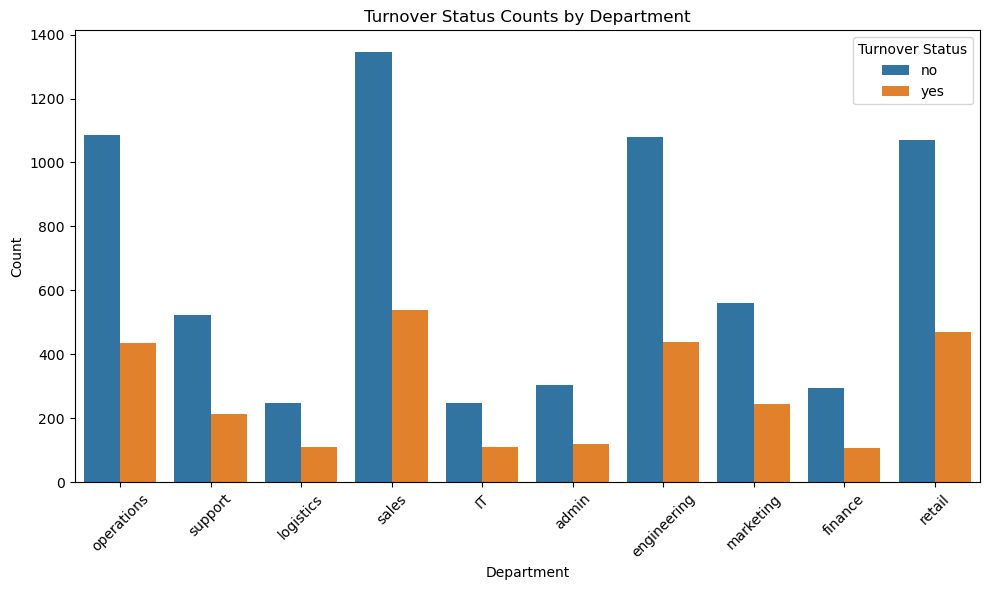

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot turnover status counts by department
plt.figure(figsize=(10, 6))
sns.countplot(x='department', hue='turnover_Status', data=df)
plt.title('Turnover Status Counts by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Turnover Status')
plt.tight_layout()
plt.show()


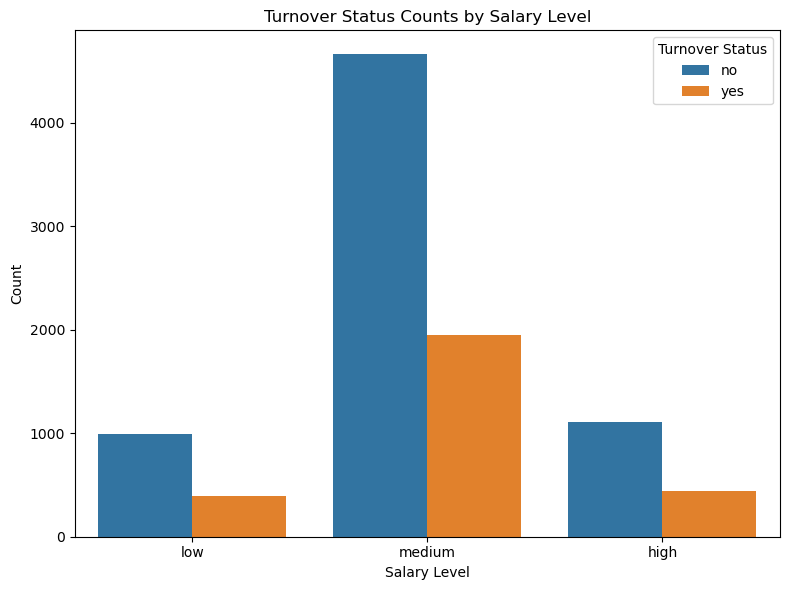

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot turnover status counts by salary level
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='turnover_Status', data=df)
plt.title('Turnover Status Counts by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.legend(title='Turnover Status')
plt.tight_layout()
plt.show()


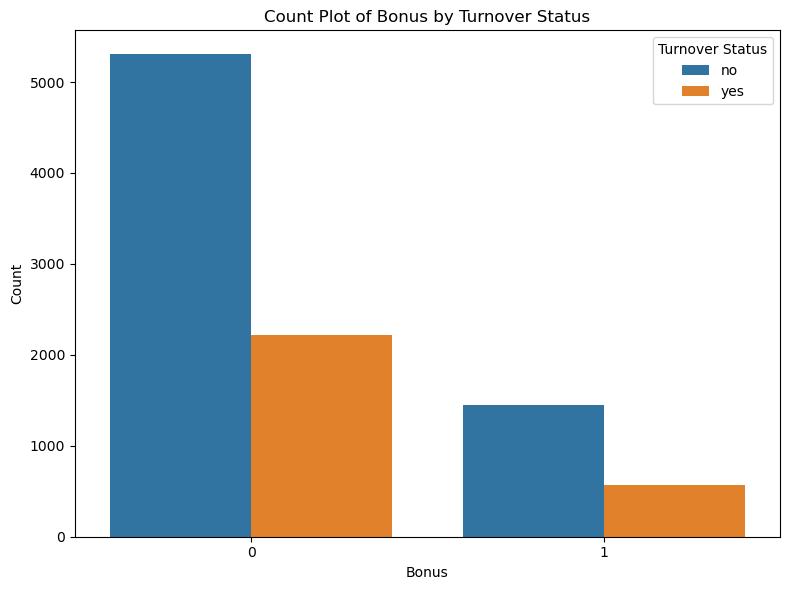

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create count plot for 'bonus' grouped by turnover status
plt.figure(figsize=(8, 6))
sns.countplot(x='bonus', hue='turnover_Status', data=df)
plt.title('Count Plot of Bonus by Turnover Status')
plt.xlabel('Bonus')
plt.ylabel('Count')
plt.legend(title='Turnover Status')
plt.tight_layout()
plt.show()


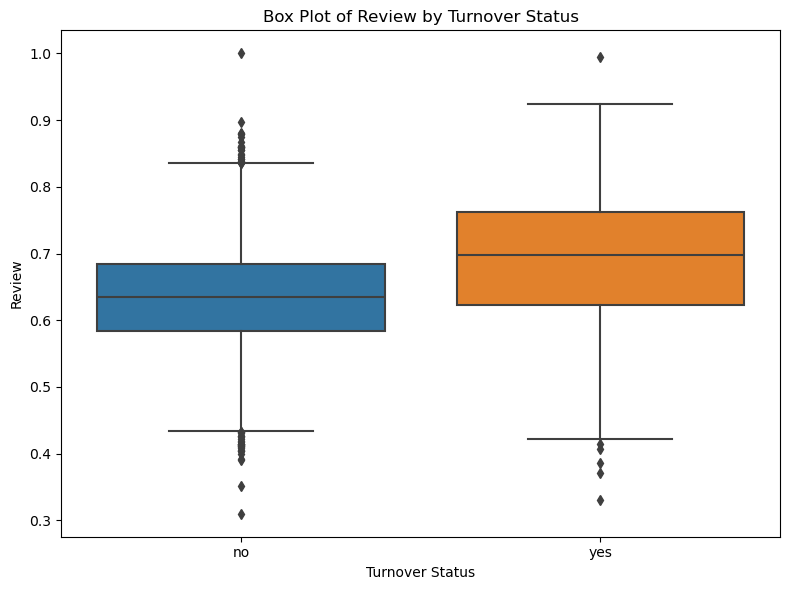

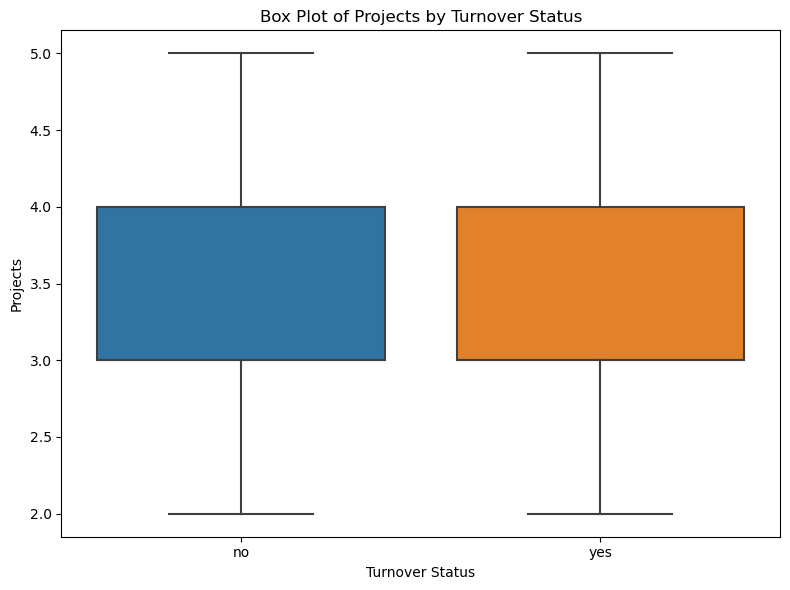

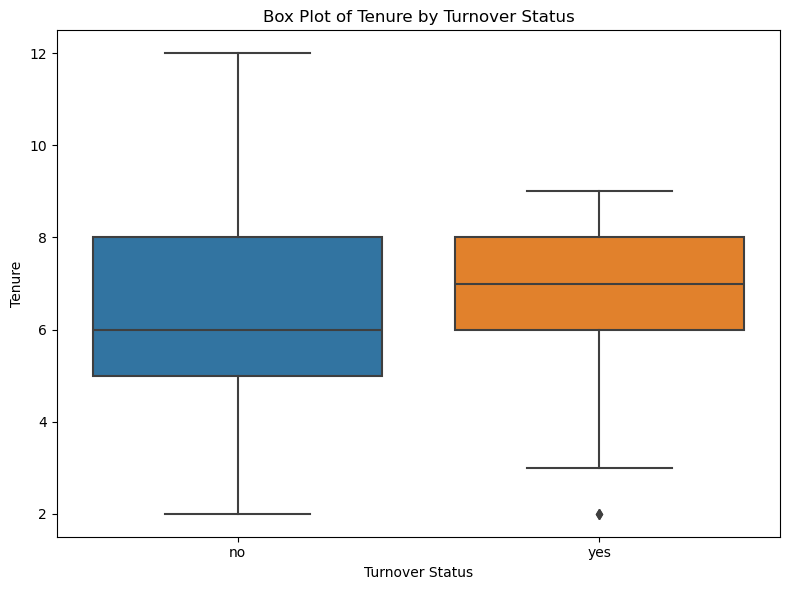

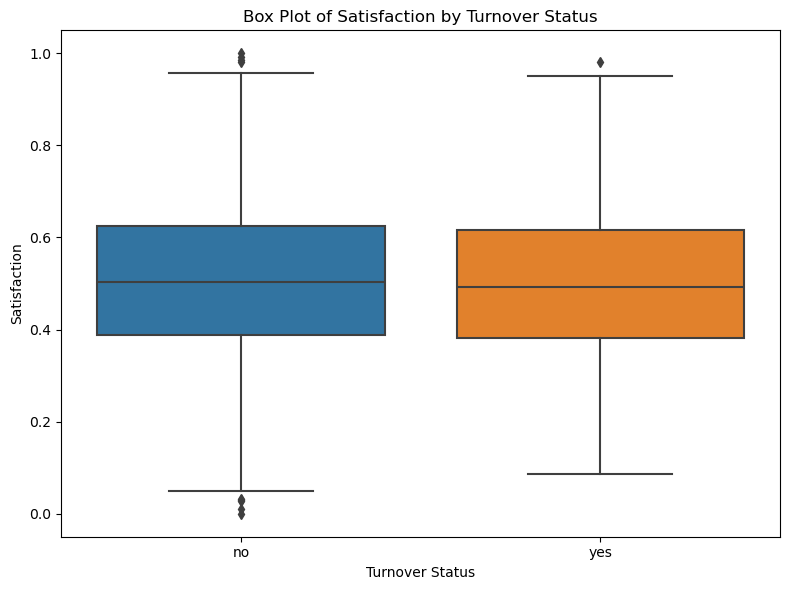

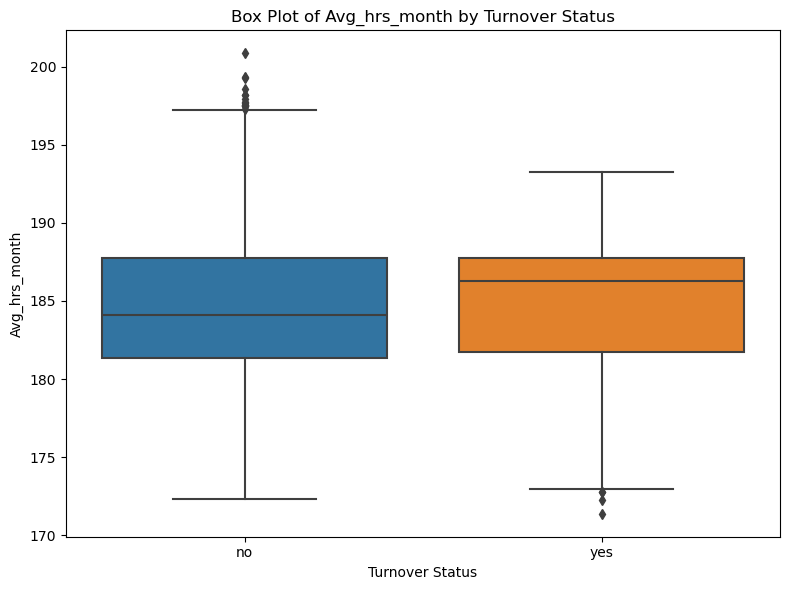

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical features
numerical_features = ['review', 'projects', 'tenure', 'satisfaction', 'avg_hrs_month']

# Create box plots for each numerical feature grouped by turnover status
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='turnover_Status', y=feature, data=df)
    plt.title(f'Box Plot of {feature.capitalize()} by Turnover Status')
    plt.xlabel('Turnover Status')
    plt.ylabel(feature.capitalize())
    plt.tight_layout()
    plt.show()


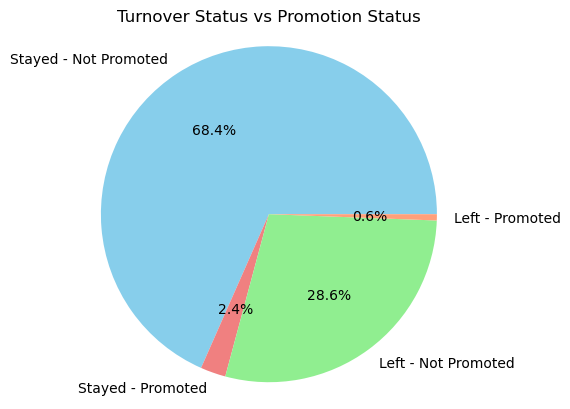

In [9]:
import matplotlib.pyplot as plt

# Group the data by turnover status and promotion status, and calculate the counts
promotion_turnover_counts = df.groupby(['turnover_Status', 'promoted']).size().unstack()

# Define labels for the pie chart
labels = ['Stayed - Not Promoted', 'Stayed - Promoted', 'Left - Not Promoted', 'Left - Promoted']

# Calculate percentages manually
total = promotion_turnover_counts.values.sum()
percentages = [(count / total) * 100 for count in promotion_turnover_counts.values.flatten()]

# Plot the pie chart
fig, ax = plt.subplots()
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon']  # Colors for each category
ax.pie(promotion_turnover_counts.values.flatten(), labels=labels, colors=colors, autopct='%1.1f%%')
ax.set_title('Turnover Status vs Promotion Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


## 3. Prepare the Data

### CATEGORICAL ENCONDING
Using machine learning techniques, categorical variables in a dataset are transformed into numerical values through the process of category encoding. Categorical variables, like gender, job title, or department, are variables with a constrained number of possible values or categories.

In this case department and Salary are categorical variables.



In [10]:
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('employee_historical_data.csv')

# Perform one-hot encoding for 'department'
df = pd.get_dummies(df, columns=['department'])

# Perform label encoding for 'salary'
label_encoder = LabelEncoder()
df['salary'] = label_encoder.fit_transform(df['salary'])

In [11]:
X = df.drop("turnover_Status", axis=1)
y = df["turnover_Status"]

In [12]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: turnover_Status, dtype: object

### SPLIT DATA INTO TRAIN AND TEST
Once we have preprocessed the data and selected the features, we can split the dataset into training and testing sets. We can use the train_test_split function from Scikit-Learn to split the data.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [14]:
X_train.shape

(7632, 18)

In [15]:
X_test.shape

(1908, 18)

## 4. Train and Evaluate the model

### LOGISITIC REGRESSION MODEL
Logistic regression is a type of statistical modeling used to identify the relationship between a dependent variable and one or more independent variables

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
logReg = LogisticRegression(max_iter=2000)

In [18]:
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [19]:
logReg_predictions = logReg.predict(X_test)

In [20]:
accuracy_score(y_test, logReg_predictions)

0.7227463312368972

## Random Forest
A technique for machine learning called random forest can be used to forecast employee turnover. It operates by building several decision trees, each of which forecasts the result variable (employee turnover). The model's accuracy is increased and overfitting is minimized by employing randomly sampled subsets of the independent variables to generate each tree.

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
ranForest = RandomForestClassifier(n_estimators=100)

In [23]:
ranForest.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
ranForest_predictions = ranForest.predict(X_test)

In [25]:
accuracy_score(y_test, ranForest_predictions)

0.8684486373165619

## Hyperparameter Tunning

This process involves optimizing the hyperparameters of the model to improve its performance and accuracy.

In [27]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid for hyperparameter tuning
parameter_grid = {
    'n_estimators': [100, 150, 200],          # Number of trees in the forest
    'criterion': ['gini', 'entropy'],         # Split criterion
    'max_depth': [None, 10, 20],              # Maximum depth of trees
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]             # Minimum samples required at a leaf node
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=parameter_grid,
    cv=5,                 # Number of folds in cross-validation
    scoring='accuracy',   # Scoring metric
    n_jobs=-1             # Number of jobs to run in parallel
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best cross-validation score
print("Best CV Score:", grid_search.best_score_)

# Evaluate the best model on the test set
test_score = grid_search.score(X_test, y_test)
print("Test Set Score:", test_score)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: 0.8681851616297642
Test Set Score: 0.860587002096436


# Saving the MODEL
Saving the model to generate predictions on new data.

In [33]:
import pickle
#import joblib

# Access the best model from the search object
best_model = grid_search.best_estimator_  # For GridSearchCV

# Save the best model to a file
#joblib.dump(best_model, 'MOdel.pkl')

# Save the model to a file
with open('MOdel.pkl', 'wb') as file:
    pickle.dump(best_model, file)


print("Best model saved successfully.")

Best model saved successfully.


In [26]:
import joblib
joblib.dump(ranForest, 'ranforest_model.pkl')

['ranforest_model.pkl']